# Project 1: Relationship of Terrorist network.


## Students

* Team: 29
* Students: Nicolas Bollier, Enea Figini, Axel Nilsson, Elias Le Boudec
* Dataset: Terrorist Relations

## Objective

To What extent is a network of terrorists similar to a social network?

In [8]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import sparse
import pygsp
import time as timeModule
%matplotlib inline

### Loading the reference data

In [10]:
adjacency = np.load('adjacency_matrix.npy')

In [12]:
data = np.load('data.npy')
labels_raw = data[:,-4:]
labels = (labels_raw[:,0] == 'colleague')*1.+\
         (labels_raw[:,1] == 'congregate')*2.+\
         (labels_raw[:,2] == 'contact')*3.+\
         (labels_raw[:,3] == 'family')*4.

In [13]:
sum(sum(adjacency))

16390

### First visualization of the reference data

In [14]:
graph = nx.from_scipy_sparse_matrix(sparse.csr_matrix(adjacency))

coords = nx.spring_layout(graph,dim = 2,k =.1,seed=0)

In [15]:
def plotGraph(signal,title,colormap=plt.cm.summer,node_size=10,node_alpha=1.,edge_alpha=.1):
    """Plot the signal on the graph with a colormap
    
    Parameters
    ----------
    signal: numpy array of shape (n_nodes, )
        The signal to be displayed on the graph
    
    title: string
        Title of the graph
    
    colormap: plt.colormaps
        Colormap for plotting the signal
        
    Returns
    -------
    None
    """
    
    cmap=colormap
    nx.draw_networkx_nodes(graph, coords, node_size=node_size, 
                           alpha=node_alpha, node_color=signal, cmap=cmap)
    nx.draw_networkx_edges(graph, coords, alpha=edge_alpha)
    plt.title(title)
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=np.min(signal),
                                                  vmax=np.max(signal)), cmap=cmap)
    sm._A = []
    plt.colorbar(sm)
    pass



/Users/figinienea/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


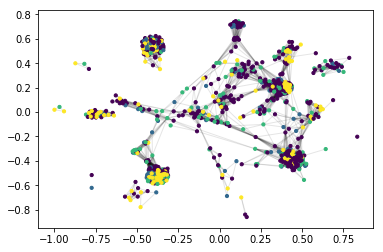

In [16]:
nx.draw_networkx_nodes(graph, coords, node_size=10, 
                       node_alpha=1.,node_color=labels)
nx.draw_networkx_edges(graph, coords, alpha=0.1)
pass

## Proprieties of Social networks:

### Homophily:

Is the tendency of individuals to associate and bond with similar others.

### Transitivity:
a is related to b , b related to c , then a related to c

#### Krawczyk et al. - 2011 - Line graphs as social networks

"These results suggest, that a line graph, constructed on a scale-free network, is a fair representation of a realistic social network ""

For a graph G with n vertices and m edges, the number of vertices of the line graph L(G) is m, and the number of edges of L(G) is half the sum of the squares of the degrees of the vertices in G, minus m.

Harary, F. (1972), "8. Line Graphs", Graph Theory, Massachusetts: Addison-Wesley, pp. 71–83.

G(n,m)

L( m , $\frac{\sum d_i^2}{2} -m$)

we know that our dataset had n = 851 nodes and 16390 Edges

(16390 +851 )*2 = 34 482

## Construction of a scale free-network

Scale free network have the following parameters:
$\alpha, \beta, \gamma$ and $\alpha+ \beta+ \gamma = 1$ 

$\alpha$ – Probability for adding a new node connected to an existing node chosen randomly according to the in-degree distribution.

$\beta$ – Probability for adding an edge between two existing nodes. One existing node is chosen randomly according the in-degree distribution and the other chosen randomly according to the out-degree distribution.

$\gamma$ – Probability for adding a new node conected to an existing node chosen randomly according to the out-degree distribution.

In [17]:
n = 300
GD = nx.scale_free_graph(n, alpha=0.10, beta=0.44, gamma=0.46, delta_in=0.1, delta_out=0.2, create_using=None, seed=1)
G= GD.to_undirected()
G.number_of_edges()

514

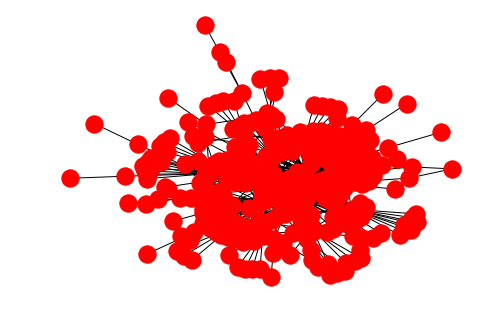

In [18]:
nx.draw_spring(G)

In [19]:
L = nx.line_graph(G)

L.number_of_edges()

19130

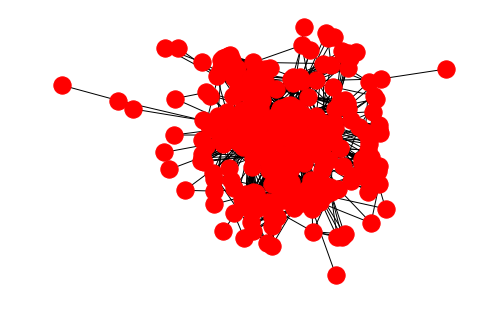

In [20]:
nx.draw_spring(L)

In [21]:
nRel = 10
componentsNodeIds = [C for C in sorted(nx.connected_components(graph),
                                key=len, reverse=True)][0:nComponents]

In [22]:
components = [graph.subgraph(nodeIds) for nodeIds in componentsNodeIds]

In [23]:
subGraph = nx.Graph()
for C in components:
    subGraph = nx.compose(subGraph,C)

In [24]:
subGraphEdgesList = list(subGraph.edges)
np.savetxt('subGraphEdgesList.csv',subGraphEdgesList,delimiter=',')

In [25]:
allComponents =  [graph.subgraph(nodeIds) for nodeIds in nx.connected_components(graph)]

In [26]:
coords = nx.spring_layout(graph,k=.25,seed=0,iterations=200)

In [27]:
subGraphCoords = nx.spring_layout(subGraph,k=.25,seed=0,iterations=200)

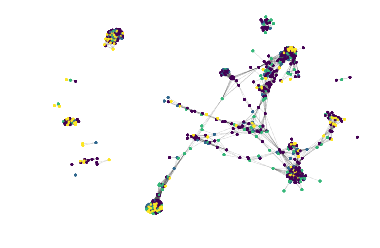

In [36]:
cmap = plt.cm.get_cmap('gist_rainbow')
for i in range(len(allComponents)):
    nx.draw_networkx_nodes(graph,coords,node_size=2,node_color=labels)
    nx.draw_networkx_edges(graph,coords,alpha=.01)
plt.axis('off')
plt.savefig('graphRel.png',dpi=600)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

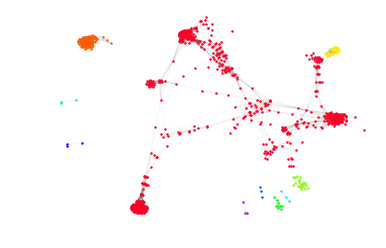

In [31]:
cmap = plt.cm.get_cmap('gist_rainbow')
for i in range(len(components)):
    nx.draw_networkx_nodes(components[i],subGraphCoords,node_size=2,node_color=cmap(i/len(components)))
    nx.draw_networkx_edges(components[i],subGraphCoords,alpha=.03)
plt.axis('off')
plt.savefig('subGraphRel.png',dpi=600)